In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
sns.set_theme(style="whitegrid", font_scale=1.1)

sys.path.append("../EDA")
DATA_PATH = "../instruction/movieReplicationSet.csv"
ALPHA = 0.005

import movie_data_formatter as mdf
import movie_rating_gender as mrgy
import general_functions as gf

df = pd.read_csv(DATA_PATH)
df = mdf.clean_data(df)
processed_data = mdf.convert_to_table(df)


{}

In [14]:
movie_names = ["Home Alone", "Finding Nemo"]
years = ['1990', '2003']
df_movies = processed_data[(processed_data['year'].isin(years)) & (processed_data['movie_name'].isin(movie_names))].dropna(subset=['rating'])

df_movies['is_nemo'] = df_movies['movie_name'].apply(lambda x: 1 if x == "Finding Nemo" else 0)

In [15]:
# stats
variation_table = df_movies.groupby('movie_name')['rating'].agg(['count', 'mean', 'median', 'var', 'std']).reset_index()
print(variation_table)


     movie_name  count      mean  median       var       std
0  Finding Nemo   1014  3.388067     3.5  0.621467  0.788331
1    Home Alone    857  3.130105     3.5  0.826803  0.909287


# Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

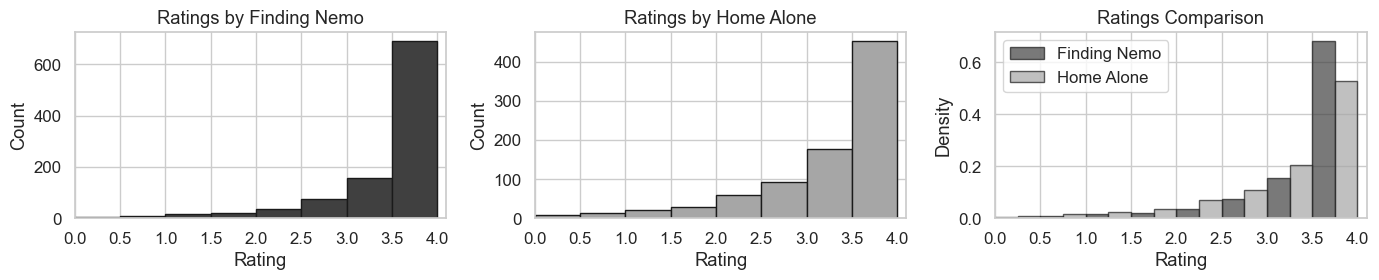

In [21]:
import numpy as np
import matplotlib.pyplot as plt

yes_group = df_movies[df_movies['is_nemo'] == 1]['rating']
no_group  = df_movies[df_movies['is_nemo'] == 0]['rating']
yes_label = "Finding Nemo"
no_label  = "Home Alone"


# bins and centers (ratings 1–4 in 0.5 steps)
bin_edges  = np.arange(0, 4.5, 0.5)                  # [1.0, 1.5, ..., 4.5]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2   # [1.25, 1.75, ..., 3.75]
xticks = np.arange(0, 4.01, 0.5)

# counts per bin
counts_only, _ = np.histogram(yes_group, bins=bin_edges)
counts_not,  _ = np.histogram(no_group, bins=bin_edges)

# bar layout
width = 0.5
fig, ax = plt.subplots(1, 3, figsize=(14, 3))

ax[0].bar(bin_centers, counts_only, width=width, label=yes_label, color="0.25", edgecolor="0.1")
ax[1].bar(bin_centers, counts_not,  width=width, label=no_label, color="0.65", edgecolor="0.1")

# labels & axes
ax[0].set_title(f"Ratings by {yes_label}")
ax[1].set_title(f"Ratings by {no_label}")
for a in ax:
    a.set_xlabel("Rating")
    a.set_ylabel("Count")
    a.set_xticks(xticks)
    a.set_xlim(0, 4.1)
    
# combined plot for density comparison
counts_only = counts_only / counts_only.sum()
counts_not  = counts_not  / counts_not.sum()

ax[2].bar(bin_centers - width/4, counts_only, width=width/2, label=yes_label, color="0.25", edgecolor="0.1", alpha=0.7)
ax[2].bar(bin_centers + width/4, counts_not,  width=width/2, label=no_label, color="0.65", edgecolor="0.1", alpha=0.7)
ax[2].set_title("Ratings Comparison")
ax[2].set_xlabel("Rating")
ax[2].set_ylabel("Density")
ax[2].set_xticks(xticks)
ax[2].set_xlim(0, 4.1)
ax[2].legend()

plt.tight_layout()

plt.savefig("../figures/home_nemo_distribution.pdf", dpi=300)


In [22]:
# Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(
    yes_group, 
    no_group, 
    alternative='two-sided',
    use_continuity=False
)
print(f"Mann-Whitney U Test: U = {u_statistic}, p-value = {p_value}")


if p_value < ALPHA:
    print(f"Reject the null hypothesis at alpha = {ALPHA}.")
    print("Conclusion: Viewers who enjoy 'The Wolf of Wall Street' alone tend to give higher ratings than those who enjoy it socially.")
else:
    print(f"Fail to reject the null hypothesis at alpha = {ALPHA}.")
    print("Conclusion: No significant difference in ratings between viewers who enjoy 'The Wolf of Wall Street' alone and those who enjoy it socially.")

Mann-Whitney U Test: U = 510860.0, p-value = 8.812975796775004e-12
Reject the null hypothesis at alpha = 0.005.
Conclusion: Viewers who enjoy 'The Wolf of Wall Street' alone tend to give higher ratings than those who enjoy it socially.
